<a href="https://colab.research.google.com/github/andreregino/network-science-notebooks/blob/main/Homework_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the used libs
import random
import networkx as netx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# reading the graph file
graph = pd.read_csv("graph.tsv", sep = '\t', header=None)

# understanding the data
print(graph.head())
print(graph.tail())

   0   1
0  1   2
1  1  18
2  1  42
3  1  44
4  1  65
         0    1
24838  989  991
24839  989  995
24840  994  998
24841  996  998
24842  998  999


In [4]:
# transforming the graph file to a networkx graph
G = netx.from_pandas_edgelist(df=graph, source=0, target=1)

# verifying number of nodes and edges
#print(G.nodes)
#print(G.edges)

[1, 2, 18, 42, 44, 65, 74, 87, 99, 114, 120, 129, 170, 175, 189, 214, 216, 223, 282, 283, 310, 333, 356, 373, 374, 377, 404, 437, 516, 562, 563, 564, 595, 614, 636, 640, 641, 647, 662, 668, 675, 689, 724, 739, 756, 777, 811, 841, 864, 866, 906, 910, 925, 940, 943, 947, 978, 983, 48, 73, 115, 121, 125, 136, 137, 145, 165, 213, 248, 256, 257, 258, 266, 307, 330, 360, 385, 391, 407, 412, 425, 434, 436, 462, 471, 528, 579, 607, 610, 620, 626, 659, 660, 690, 695, 712, 713, 747, 748, 770, 772, 779, 789, 801, 813, 825, 871, 873, 919, 931, 997, 3, 5, 8, 17, 28, 38, 60, 94, 131, 148, 190, 194, 203, 218, 254, 325, 338, 357, 378, 389, 444, 493, 630, 638, 648, 669, 744, 757, 824, 863, 886, 902, 909, 912, 914, 915, 961, 984, 4, 41, 56, 97, 110, 122, 211, 264, 293, 294, 297, 316, 362, 364, 458, 486, 490, 509, 522, 544, 546, 553, 561, 591, 631, 679, 687, 700, 714, 743, 775, 803, 818, 821, 849, 867, 872, 889, 894, 896, 946, 13, 21, 47, 80, 95, 98, 156, 191, 207, 273, 299, 303, 380, 382, 399, 403, 416,

In [6]:
# choosing 100 random edges from the list of 1000 nodes
random_edges = np.random.choice(G.nodes, 100)
print("Count of random items:", len(random_edges))
print(random_edges)


Count of random items: 100
[552  17 531 695 413 600 926 421  42 881 962 208 768 934 804 212 439  83
 680 243 108 205 104 259 495 625 214 260 353 189  27 206 748 446 593 757
 659  96 682 628 421 659 221 910 637 817  88 918 853 555 158 750 690 576
 578 205 491 705 336 296 592 309 531 297 806 907 944 631  89 518 432 608
 633 167 548 395 294 934 862 975 755 852 536 254 533 298 663 954 936  93
 931 202 596 874 912 326 893 765 536 159]


In [7]:
# appending the 100 random nodes in a txt file
count = 0
with open('random_nodes.txt', 'w+') as f:
  for i in random_edges:
    line = "V"+ str(count) + " " + str(i)
    f.write('%s \n' %line)
    count+=1
f.close()

### Case 1
Here I'm considering that the 100 nodes are NOT a subgraph of the original graph with 100 nodes

In [8]:
# discovering the shortest path between Vi and Vi+1
comma_separated_list = []
s_path_size = []

for i in range(0,len(random_edges), 2):

  #calculating shortest path
  s_path = netx.shortest_path(G,source=random_edges[i],target=random_edges[i+1])
  s_path_size.append(len(s_path)-1)
  s_path1 = [str(element) for element in s_path]
  print("Shortest path from Vi", random_edges[i], "to Vi+1", random_edges[i+1], "is", (s_path), "with distance equals to", len(s_path)-1)

  # creating an array with all distance values
  comma_separated_values = ", ".join(s_path1)
  comma_separated_list.append(comma_separated_values)

Shortest path from Vi 552 to Vi+1 17 is [552, 367, 17] with distance equals to 2
Shortest path from Vi 531 to Vi+1 695 is [531, 695] with distance equals to 1
Shortest path from Vi 413 to Vi+1 600 is [413, 38, 467, 600] with distance equals to 3
Shortest path from Vi 926 to Vi+1 421 is [926, 63, 421] with distance equals to 2
Shortest path from Vi 42 to Vi+1 881 is [42, 513, 881] with distance equals to 2
Shortest path from Vi 962 to Vi+1 208 is [962, 270, 208] with distance equals to 2
Shortest path from Vi 768 to Vi+1 934 is [768, 107, 934] with distance equals to 2
Shortest path from Vi 804 to Vi+1 212 is [804, 124, 212] with distance equals to 2
Shortest path from Vi 439 to Vi+1 83 is [439, 248, 83] with distance equals to 2
Shortest path from Vi 680 to Vi+1 243 is [680, 312, 243] with distance equals to 2
Shortest path from Vi 108 to Vi+1 205 is [108, 752, 205] with distance equals to 2
Shortest path from Vi 104 to Vi+1 259 is [104, 610, 259] with distance equals to 2
Shortest pat

In [9]:
# writing shortest path to file
with open('case1_shortest_path.txt', 'w+') as f:
  for values in comma_separated_list:
    f.write('%s\n' %values)
f.close()

Array of distances: [2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2]


<BarContainer object of 4 artists>

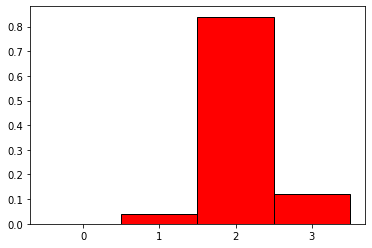

In [10]:
# Plot the distribution of the distances
print("Array of distances:", s_path_size)

columns= np.arange(0,max(s_path_size)+2,1)
results, edges = np.histogram(s_path_size, density=True, bins = columns)
plt.xticks(edges, edges)
plt.bar(edges[:-1], results, 1, color='red', edgecolor='black')

### Case 2
Here I'm considering that the 100 nodes are a subgraph of the original graph with 100 nodes

In [11]:
# creating a subgraph of 100 nodes from the original graph
subg = G.subgraph(random_edges)

# discovering the shortest path between Vi and Vi+1
comma_separated_list = []
s_path_size = []

for i in range(0,len(random_edges), 2):

  #calculating shortest path
  try:
    s_path = netx.shortest_path(subg,source=random_edges[i],target=random_edges[i+1])
    s_path_size.append(len(s_path)-1)
    s_path1 = [str(element) for element in s_path]
    print("Shortest path from Vi", random_edges[i], "to Vi+1", random_edges[i+1], "is", (s_path), "with distance equals to", len(s_path)-1)

    # creating an array with all distance values
    comma_separated_values = ", ".join(s_path1)
    comma_separated_list.append(comma_separated_values)
  except:
    s_path_size.append(0)
    comma_separated_list.append("[]")

Shortest path from Vi 552 to Vi+1 17 is [552, 214, 104, 931, 536, 259, 17] with distance equals to 6
Shortest path from Vi 531 to Vi+1 695 is [531, 695] with distance equals to 1
Shortest path from Vi 413 to Vi+1 600 is [413, 206, 83, 208, 975, 600] with distance equals to 5
Shortest path from Vi 926 to Vi+1 421 is [926, 852, 421] with distance equals to 2
Shortest path from Vi 42 to Vi+1 881 is [42, 243, 536, 625, 881] with distance equals to 4
Shortest path from Vi 962 to Vi+1 208 is [962, 874, 208] with distance equals to 2
Shortest path from Vi 768 to Vi+1 934 is [768, 918, 637, 159, 934] with distance equals to 4
Shortest path from Vi 804 to Vi+1 212 is [804, 533, 208, 212] with distance equals to 3
Shortest path from Vi 439 to Vi+1 83 is [439, 353, 83] with distance equals to 2
Shortest path from Vi 680 to Vi+1 243 is [680, 536, 243] with distance equals to 2
Shortest path from Vi 108 to Vi+1 205 is [108, 439, 750, 205] with distance equals to 3
Shortest path from Vi 104 to Vi+1 

In [12]:
# writing shortest path to file
with open('case2_shortest_path.txt', 'w+') as f:
  for values in comma_separated_list:
    f.write('%s\n' %values)
f.close()

Array of distances: [6, 1, 5, 2, 4, 2, 4, 3, 2, 2, 3, 3, 4, 4, 2, 4, 4, 2, 3, 2, 4, 2, 3, 2, 4, 3, 3, 3, 4, 4, 4, 3, 3, 2, 5, 3, 4, 4, 3, 3, 3, 3, 4, 1, 4, 3, 3, 3, 2, 3]


<BarContainer object of 7 artists>

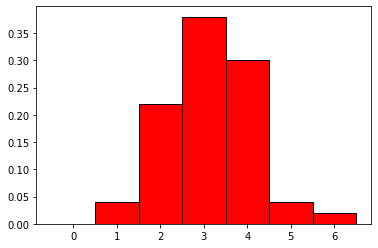

In [13]:
# Plot the distribution of the distances
print("Array of distances:", s_path_size)

columns= np.arange(0,max(s_path_size)+2,1)
results, edges = np.histogram(s_path_size, density=True, bins = columns)
plt.xticks(edges, edges)
plt.bar(edges[:-1], results, 1, color='red', edgecolor='black')